### Google drive colab

In [3]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package libfuse2:amd64.
(Reading database ... 22280 files and directories currently installed.)
Preparing to unpack .../libfuse2_2.9.7-1ubuntu1_amd64.deb ...
Unpacking libfuse2:amd64 (2.9.7-1ubuntu1) ...
Selecting previously unselected package fuse.
Preparing to unpack .../fuse_2.9.7-1ubuntu1_amd64.deb ...
Unpacking fuse (2.9.7-1ubuntu1) ...
Selecting previously unselected package google-drive-ocamlfuse.
Preparing to unpack .../google-drive-ocamlfuse_0.7.0-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.0-0ubuntu1~ubuntu18.04.1) ...
Setting up libfuse2:amd64 (2.9.7-1ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
Setting up fuse (2.9.7-1ubuntu1) ...
Setting up google-drive-ocamlfuse (0.7.0-0ubuntu1~ubuntu18.04.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleus

In [4]:
!mkdir drive
!google-drive-ocamlfuse drive
!ls drive/"Colab Notebooks"

5291_Dataclean.ipynb  Phasei_try.ipynb	Untitled0.ipynb


In [0]:
import pandas as pd
import numpy as np
from operator import methodcaller
data= pd.read_csv('drive/5291/training.csv')

In [0]:
from operator import methodcaller
def genre_count(data):
    genre = data.genre_ids
    genre_str = list(map(methodcaller('split', '|'), map(str,genre)))

    genre_uni = []
    for i in range(data.shape[0]):
        for j in range(len(genre_str[i])):
            if genre_str[i][j] not in genre_uni :
                genre_uni.append(genre_str[i][j])
    return genre_uni

genre_uni = genre_count(data)

In [104]:
data.groupby(["genre_ids"]).size()

genre_ids
1000                            4
1007                           34
1011                        23642
1011|2189|367                   1
1011|359                        1
1011|691                       57
1019                           29
1026                           11
1033                           18
1040                          122
1040|1155                      21
1047                          156
1054                           56
1068                           17
1082                          381
109                           803
1096                           60
1096|958                        1
109|1138                        1
109|118                        18
109|1259                        8
109|139                       318
109|2122                        3
109|359                        10
109|465                        52
109|921                         1
109|94                          1
1103                           15
1110                            2
1117

In [76]:
genre_id_repeat=data[['msno','genre_ids','target']]
genre_id_repeat.head()

,msno,genre_ids,target
0,qXWBbfsZ6923Dq7OvwMP2rtVE3phQqlEKcLp2I5wofw=,465,0
1,Qja9LnwXWgTjFG5G1iMm/1J5Be6jhD/LUikBU9e9bWg=,458,0
2,6fGAUf1BJeTefYr5PUdmJVQ80DWsKr/3JRIf2w9MGAk=,465,1
3,dY4MN8EfoumZIs/0+ugiv/qGkNWIWdnWLIrFpjFYNTw=,458,1
4,kktfViwY41gERgWGXWDnVPl/oNF5fLNigX11zfhVOl0=,465,1


In [0]:
genre_repeat=genre_id_repeat.groupby(['msno','genre_ids'])['target'].agg(['mean',"count"]).reset_index()

In [0]:
for i in range(len(genre_repeat)):
  genre_repeat.at[i,'genre_ids']=(genre_repeat.genre_ids[i].split("|"))

## Melt and add extra rows for additional genres

In [10]:
genre_repeat.head(20)

,msno,genre_ids,mean,count
0,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,[1180],0.000000,1
1,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,[1259],0.369565,46
2,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,[139],1.000000,4
3,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,[1609],0.600000,15
4,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,[1616],0.000000,4
5,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,"[1616, 1609]",0.300000,10
6,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,[2022],0.300000,10
7,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,[359],0.677419,31
8,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,[451],0.272727,11
9,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,[458],0.545455,55


In [0]:
new_df=genre_repeat.genre_ids.apply(pd.Series) \
    .merge(genre_repeat, right_index = True, left_index = True) \
    .drop(["genre_ids"], axis = 1) \
    .melt(id_vars = ['msno','mean','count'], value_name = "genre_ids") \
    .drop("variable", axis = 1) \
    .dropna() \
    .drop_duplicates()

In [119]:
new_df

,msno,mean,count,genre_ids
0,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,0.000000,1,1180
1,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,0.369565,46,1259
2,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,1.000000,4,139
3,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,0.600000,15,1609
4,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,0.000000,4,1616
5,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,0.300000,10,1616
6,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,0.300000,10,2022
7,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,0.677419,31,359
8,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,0.272727,11,451
9,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,0.545455,55,458


In [0]:
#Turn pd series to dataframe
new_df1=pd.DataFrame(new_df.values.reshape(457277 ,4),columns=["msno","mean","count","genre_ids"])
new_df1.genre_ids=(new_df1.genre_ids).astype(int)

In [122]:
len(np.unique(new_df1.genre_ids))

163

In [0]:
new_df_top8 = new_df.sort_values(['mean'],ascending=False).groupby('msno').head(8).reset_index(drop=True)

In [0]:
clean_new_df=new_df_top8.sort_values('msno')

### Put top8 genre repeat rate with the same user ID in a list(easier to use pandas series)

In [0]:
genre_list_df=clean_new_df.groupby('msno')['genre_ids'].apply(list)
genre_list_df.columns  = ['msno', 'genre_ids']

In [126]:
clean_new_df

,msno,mean,count,genre_ids
136174,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,0.428571,7,921
109118,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,0.677419,31,359
116926,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,0.600000,15,1609
124741,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,0.500000,4,1259
128307,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,0.500000,4,465
121543,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,0.526042,192,465
120555,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,0.545455,55,458
68713,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,1.000000,4,139
68696,++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,1.000000,1,465
68702,++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,1.000000,3,1609


In [0]:
eight_genre_repeat=genre_list_df.apply(pd.Series).reset_index(drop=True)

In [0]:
eight_genre_repeat.fillna("", inplace=True)
eight_genre_repeat.columns=['genre_repeat_top1','genre_repeat_top2','genre_repeat_top3','genre_repeat_top4','genre_repeat_top5','genre_repeat_top6','genre_repeat_top7','genre_repeat_top8']
eight_genre_repeat['msno']=np.unique(new_df_top8.msno)

In [129]:
eight_genre_repeat

,genre_repeat_top1,genre_repeat_top2,genre_repeat_top3,genre_repeat_top4,genre_repeat_top5,genre_repeat_top6,genre_repeat_top7,genre_repeat_top8,msno
0,921,359,1609,1259,465,465,458,139,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=
1,465,1609,1180,1011,430,1609,1259,1616,++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=
2,465,829,458,2022,921,921,465,458,++e+jsxuQ8UEnmW40od9Rq3rW7+wAum4wooXyZTKJpk=
3,465,458,,,,,,,++xWL5Pbi2CpG4uUugigQahauM0J/sBIRloTNPBybIU=
4,359,1011,1259,139,1609,451,458,921,+/SKX44s4ryWQzYzuV7ZKMXqIKQMN1cPz3M8CJ8CFKU=
5,1609,2022,1616,465,,,,,+/USTSczbe/vrPPatLFT8TPKNBt0J5ValJhfr3vNALI=
6,864,359,857,2122,275,1995,786,921,+/UwoUi5+rNj/F6RO6gMrMhOy0oTzs90MWKVNZs4+Wg=
7,465,,,,,,,,+/tv7+daiSsEEBhNDnQZL32wdfmr2GSYmX2aQPGONRY=
8,465,1259,458,921,,,,,+/vppV5BoMKMNAk7Bej5rjhKeE6VqrRjUv8EYXoAjyM=
9,465,786,458,,,,,,+0+XaewkS3za58vHwKCVGwRYRvjig4lTtKDV/tOkzbU=


In [130]:
df_1 = pd.read_csv('drive/5291/1.members_add_genre.csv')
df_1

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date,genre_1,genre_2,genre_3,genre_4,genre_5
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920,465,458.0,921.0,451.0,1609.0
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622,465,444.0,921.0,NaN,NaN
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712,1609,465.0,1616.0,139.0,1259.0
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907,444,921.0,465.0,NaN,NaN
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613,458,NaN,NaN,NaN,NaN
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13,43,female,9,20120703,20171006,1259,451.0,NaN,NaN,NaN
6,Sw9AT8QoR4wWiNUqHZUH6g5ahzGUx4lo1g+Y3xE2f2M=,1,0,NaN,4,20160326,20160329,880,NaN,NaN,NaN,NaN
7,pg6bT2XZkSP1TDBy4qn3HBPY/HffKQ/bg8WIISQYBSY=,1,0,NaN,7,20160130,20170930,465,1609.0,458.0,139.0,444.0
8,kfk1AdTNH2dNqF5LzIs4e0vwGPejw2jrnFjJlcYnEgk=,1,0,NaN,7,20110111,20170930,465,458.0,921.0,444.0,972.0
9,tscijwx4dbEp0NXGl+iFtHJ8zrj+TkcMrduOQk9t+gE=,1,0,NaN,7,20160217,20170613,465,444.0,458.0,NaN,NaN


### Merge finally

In [0]:
result=df_1.merge(eight_genre_repeat, left_on='msno', right_on='msno', how='outer')

In [0]:
result.to_csv('drive/5291/2.members_add_genres_repeat_top8.csv')

In [133]:
eight_genre_repeat

,genre_repeat_top1,genre_repeat_top2,genre_repeat_top3,genre_repeat_top4,genre_repeat_top5,genre_repeat_top6,genre_repeat_top7,genre_repeat_top8,msno
0,921,359,1609,1259,465,465,458,139,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=
1,465,1609,1180,1011,430,1609,1259,1616,++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=
2,465,829,458,2022,921,921,465,458,++e+jsxuQ8UEnmW40od9Rq3rW7+wAum4wooXyZTKJpk=
3,465,458,,,,,,,++xWL5Pbi2CpG4uUugigQahauM0J/sBIRloTNPBybIU=
4,359,1011,1259,139,1609,451,458,921,+/SKX44s4ryWQzYzuV7ZKMXqIKQMN1cPz3M8CJ8CFKU=
5,1609,2022,1616,465,,,,,+/USTSczbe/vrPPatLFT8TPKNBt0J5ValJhfr3vNALI=
6,864,359,857,2122,275,1995,786,921,+/UwoUi5+rNj/F6RO6gMrMhOy0oTzs90MWKVNZs4+Wg=
7,465,,,,,,,,+/tv7+daiSsEEBhNDnQZL32wdfmr2GSYmX2aQPGONRY=
8,465,1259,458,921,,,,,+/vppV5BoMKMNAk7Bej5rjhKeE6VqrRjUv8EYXoAjyM=
9,465,786,458,,,,,,+0+XaewkS3za58vHwKCVGwRYRvjig4lTtKDV/tOkzbU=


In [0]:
freq_result = eight_genre_repeat.iloc[:,0:7].apply(pd.value_counts).sum(axis=1)
freq_result=freq_result.drop(labels=['']).reset_index()
for i in range(len(freq_result)):
  freq_result.loc[i,'genre_id']=int(freq_result.loc[i,'index'])
del freq_result['index']


In [138]:
final_df=freq_result.sort_values(by=['genre_id']).reset_index(drop=True)
genre_name=final_df.genre_id

final_df.rename(columns={ final_df.columns[0]: "Repeated_Frequency" })

,Repeated_Frequency,genre_id
0,38.0,94.0
1,10.0,95.0
2,3.0,102.0
3,2090.0,109.0
4,178.0,118.0
5,1922.0,125.0
6,5401.0,139.0
7,3.0,177.0
8,4.0,184.0
9,8.0,191.0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


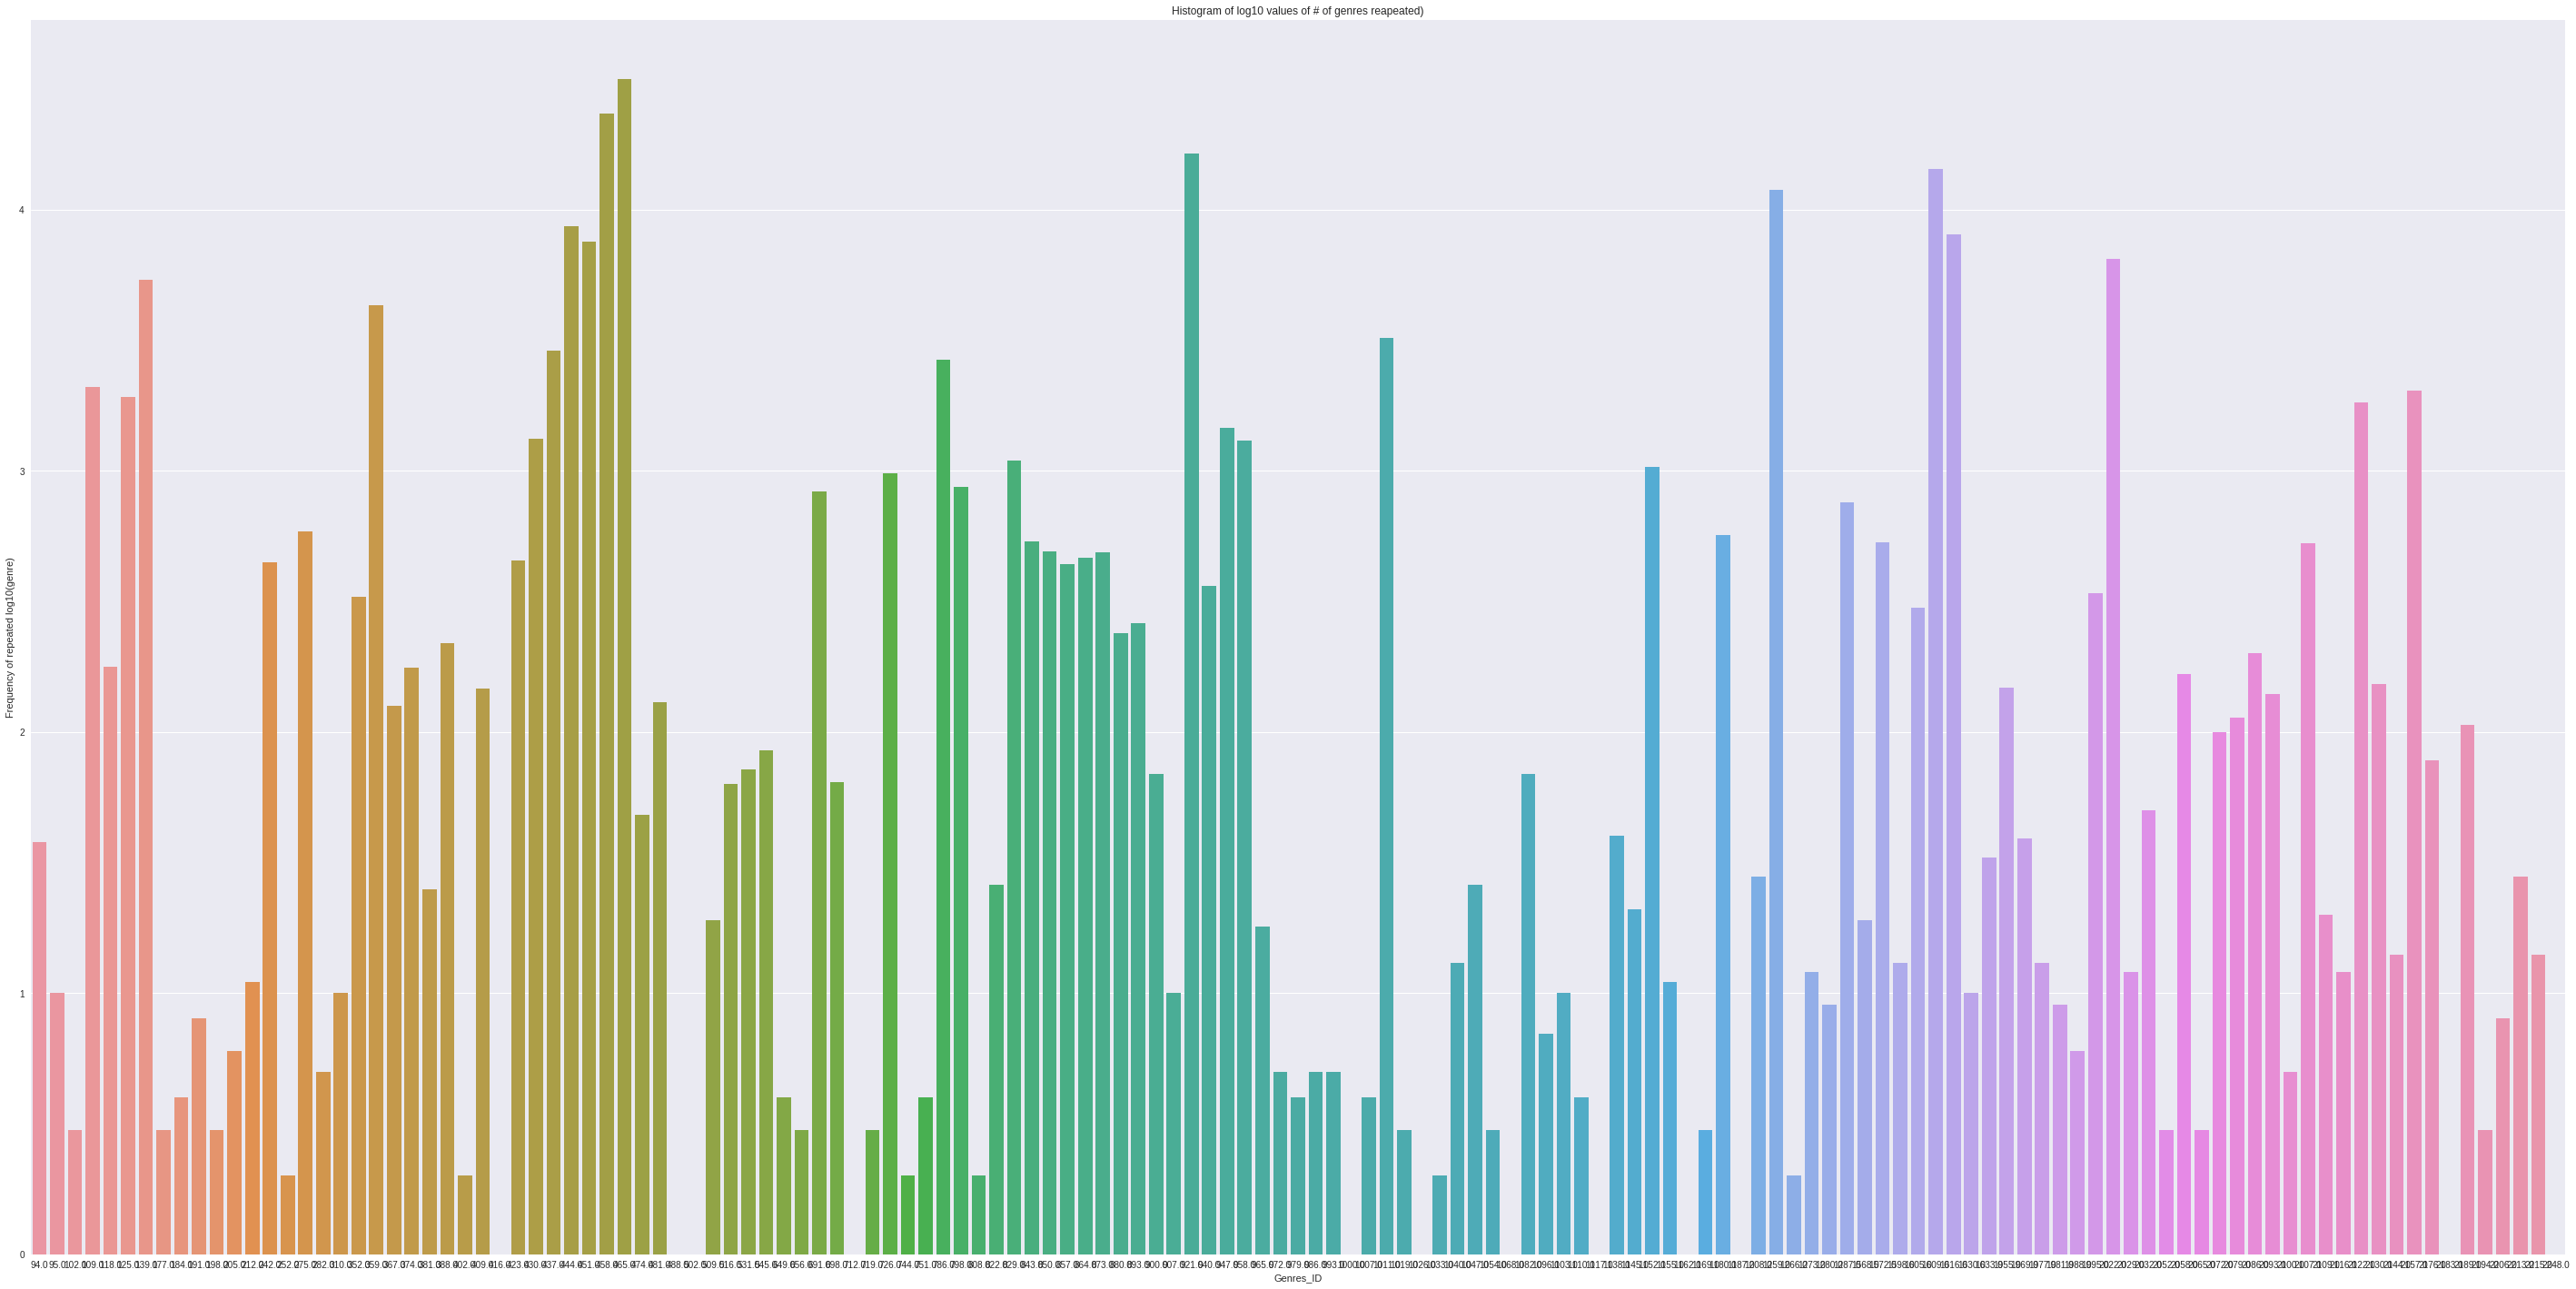

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(50, 25)) 
fig = plt.subplot(1,1,1)
sns.barplot(x=genre_name, y=np.log10(final_df.iloc[:,0]))
fig.set_xlabel('Genres_ID')
fig.set_ylabel('Frequency of repeated log10(genre)')
fig.set_title('Histogram of log10 values of # of genres reapeated)')
plt.savefig('drive/5291/genre_repeat_rank.png',dpi=400)
plt.show()